# Iris Classification

---

## Table of Contents

* [Setup](#c0)
* [Data Visualization](#c1)
* [FIS Creation](#c2)
* [Evaluation](#c3)

---

## Setup   <a name="c0"></a>

In [1]:
import hotfis as hf

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
# Load data
data = load_iris()

# Load X
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris.columns = iris.columns.str.rstrip(" (cm)")
iris.columns = iris.columns.str.replace(' ', '')

# Load y
iris["species"] = pd.Series(data.target)
iris["species"] = pd.Categorical.from_codes(data.target, data.target_names)

# Remove setosa
iris = iris[iris["species"] != "setosa"]

iris

,sepallength,sepalwidth,petallength,petalwidth,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


---

## Data Visualization   <a name="c2"></a>

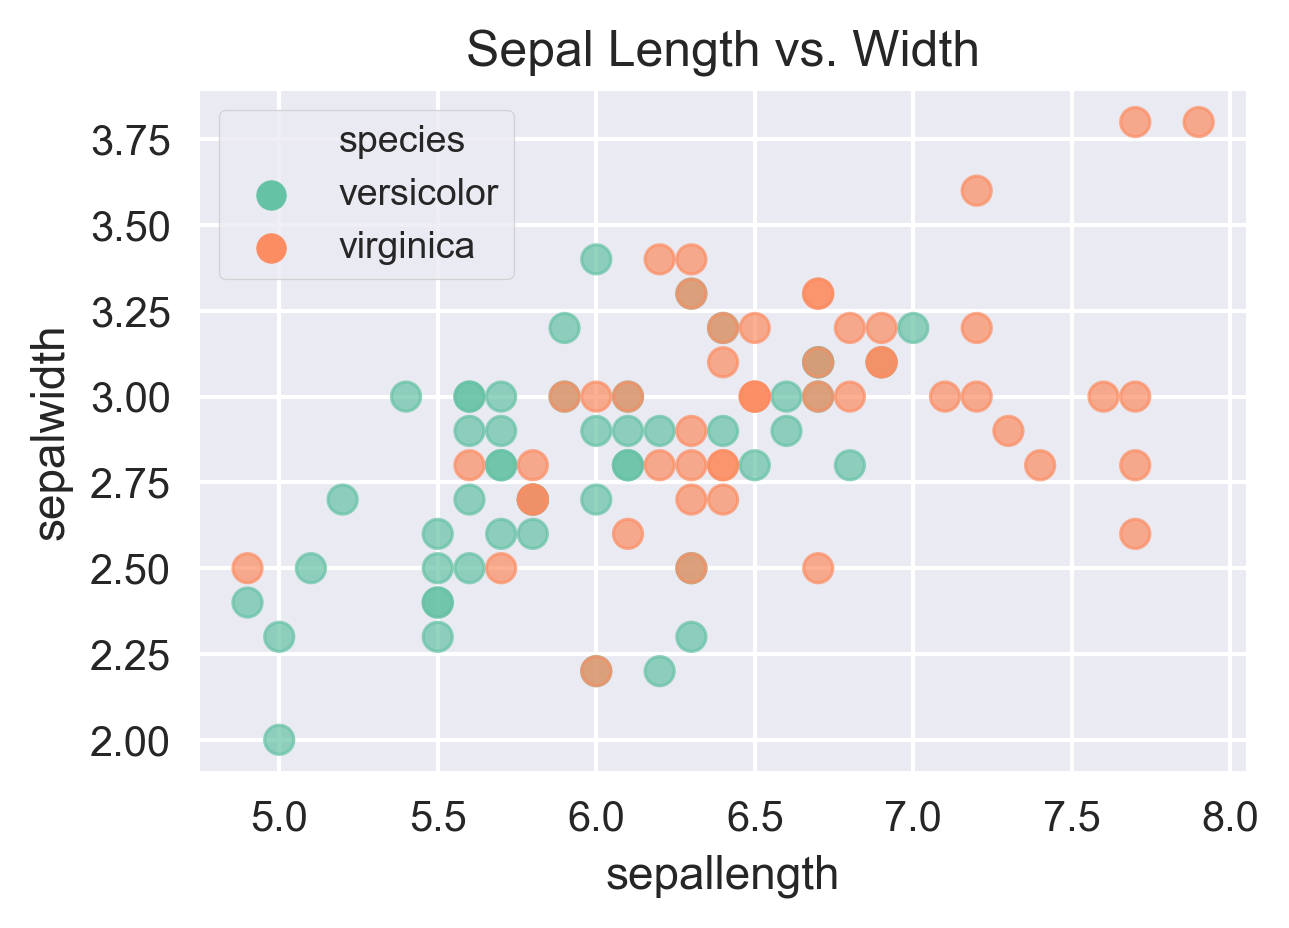

In [3]:
plt.figure(figsize=(4.5, 3), dpi=300)
sns.scatterplot(iris["sepallength"], iris["sepalwidth"], hue=iris["species"],
                alpha=0.7, edgecolor=None, palette="Set2")
plt.title("Sepal Length vs. Width")
plt.legend(fontsize=9, loc=2, frameon=True)
plt.savefig("img/iris/svs.png", bbox_inches="tight", facecolor="white")
plt.show()

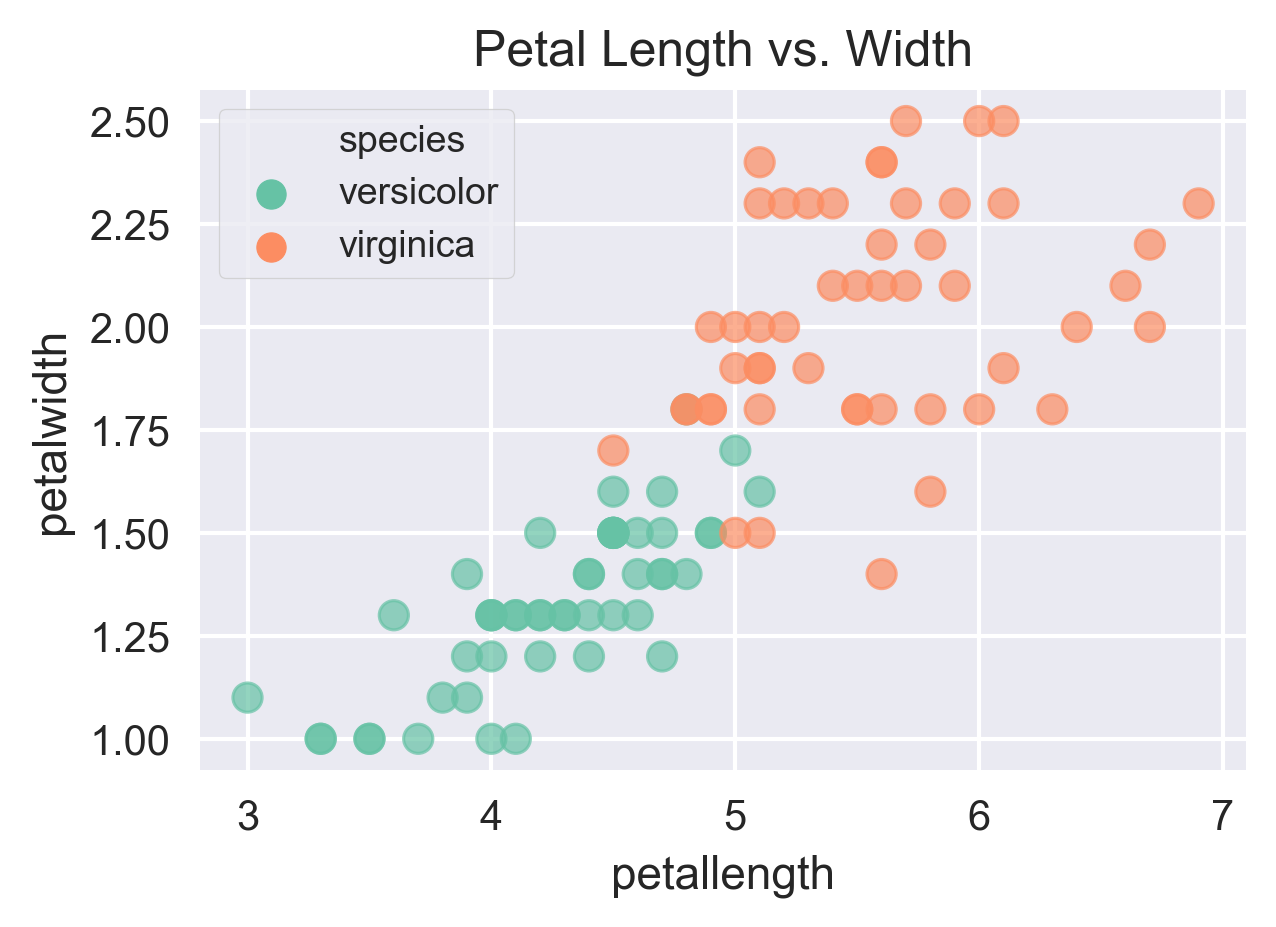

In [4]:
plt.figure(figsize=(4.5, 3), dpi=300)
sns.scatterplot(iris["petallength"], iris["petalwidth"], hue=iris["species"],
                alpha=0.7, edgecolor=None, palette="Set2")
plt.title("Petal Length vs. Width")
plt.legend(fontsize=9, loc=2, frameon=True)
plt.savefig("img/iris/pvs.png", bbox_inches="tight", facecolor="white")
plt.show()

---

## FIS Creation  <a name="c2"></a>

> Create a FIS to determine if an iris is a versicolor or virginica.

##### Groupset

In [65]:
# Define membership function groupset
groupset = hf.FuzzyGroupset([
    # Sepal length
    hf.FuzzyGroup("sepallength", 4.7, 7.8, [
        hf.FuzzyFunc("small", [5.7, 6.8], "leftedge"),
        hf.FuzzyFunc("large", [5.7, 6.8], "rightedge")
    ]),
    
    # Sepal width
    hf.FuzzyGroup("sepalwidth", 1.8, 3.8, [
        hf.FuzzyFunc("small", [2.3, 3.2], "leftedge"),
        hf.FuzzyFunc("large", [2.5, 3.3], "rightedge")
    ]),
    
    # Petal length
    hf.FuzzyGroup("petallength", 4.0, 5.9, [
        hf.FuzzyFunc("small", [4.8, 5.1], "leftedge"),
        hf.FuzzyFunc("large", [4.8, 5.0], "rightedge")
    ]),
    
    # Petal width
    hf.FuzzyGroup("petalwidth", 1.2, 2.1, [
        hf.FuzzyFunc("small", [1.6, 1.7], "leftedge"),
        hf.FuzzyFunc("large", [1.5, 1.7], "rightedge")
    ]),

    # Output
    hf.FuzzyGroup("virginica", -1.0, 1.0, [
        hf.FuzzyFunc("unlikely", [-1.0], "tsk"),
        hf.FuzzyFunc("likely", [1.0], "tsk")
    ]),
])

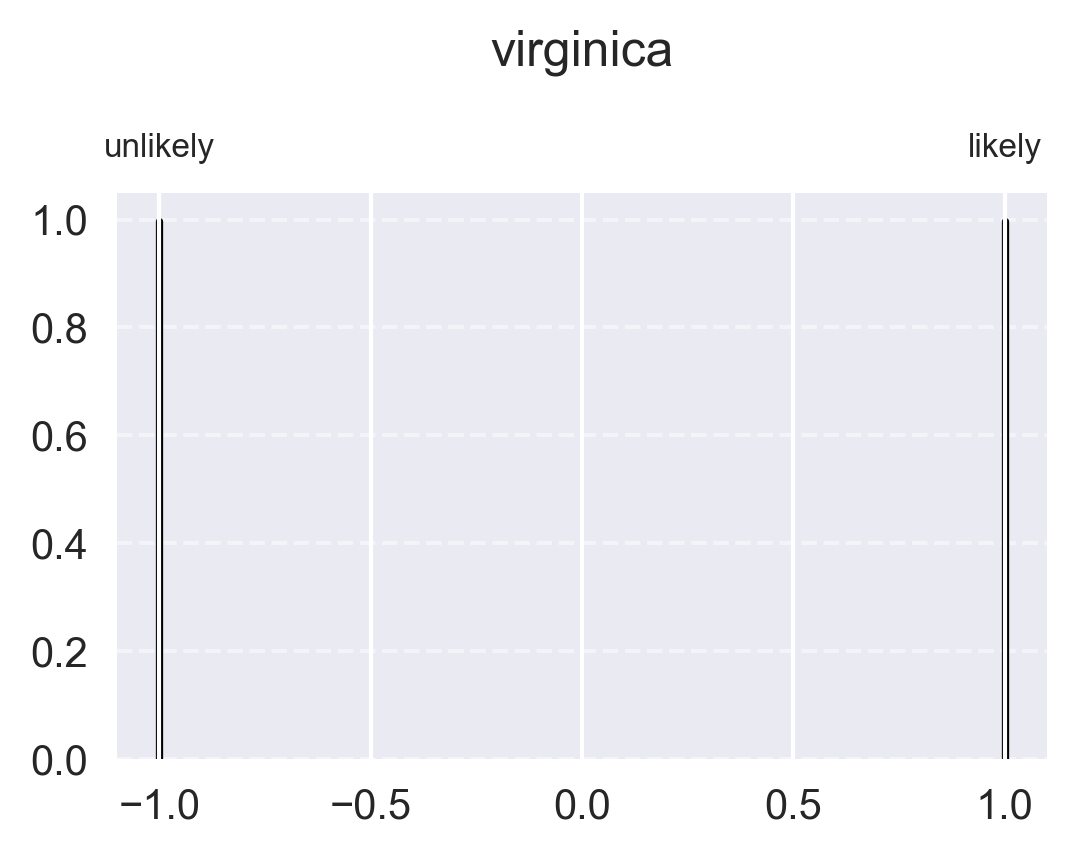

In [75]:
feature = "virginica"
plt.figure(figsize=(4, 2.5), dpi=300)
groupset[feature].plot()
plt.savefig("img/iris/virginica.png", bbox_inches="tight", facecolor="white")
plt.show()

##### Ruleset

In [54]:
# Define the fuzzy ruleset using group and function names from above
ruleset = hf.FuzzyRuleset([
    hf.FuzzyRule("if sepallength is small then virginica is unlikely"),
    hf.FuzzyRule("if sepallength is large then virginica is likely"),
    
    hf.FuzzyRule("if sepalwidth is small then virginica is unlikely"),
    hf.FuzzyRule("if sepalwidth is large then virginica is likely"),
    
    hf.FuzzyRule("if petallength is small then virginica is unlikely"),
    hf.FuzzyRule("if petallength is large then virginica is likely"),
    
    hf.FuzzyRule("if petalwidth is small then virginica is unlikely"),
    hf.FuzzyRule("if petalwidth is large then virginica is likely"),
])

##### FIS

In [55]:
fis = hf.FIS(groupset, ruleset)

## Evaluation   <a name="c3"></a>

In [56]:
# Evaluate FIS for each iris
iris["is_virginica"] = fis.eval_tsk(iris)["virginica"]

# Adjust from [-1, 1] to [0, 1]
iris["is_virginica"] = (iris["is_virginica"] + 1) / 2

# Create column of negation
iris["is_versicolor"] = -iris["is_virginica"] + 1

iris

,sepallength,sepalwidth,petallength,petalwidth,species,is_virginica,is_versicolor,prediction
50,7.0,3.2,4.7,1.4,versicolor,0.483871,0.516129,versicolor
51,6.4,3.2,4.5,1.5,versicolor,0.390029,0.609971,versicolor
52,6.9,3.1,4.9,1.5,versicolor,0.558621,0.441379,virginica
53,5.5,2.3,4.0,1.3,versicolor,0.000000,1.000000,versicolor
54,6.5,2.8,4.6,1.5,versicolor,0.288595,0.711405,versicolor
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.918608,0.081392,virginica
146,6.3,2.5,5.0,1.9,virginica,0.619165,0.380835,virginica
147,6.5,3.0,5.2,2.0,virginica,0.871349,0.128651,virginica
148,6.2,3.4,5.4,2.3,virginica,0.863636,0.136364,virginica


##### Round and Calculate Accuracy

In [57]:
iris["prediction"] = np.round(iris["is_virginica"]).astype("int")
iris["prediction"] = iris["prediction"].map({0: "versicolor", 1: "virginica"})
iris

,sepallength,sepalwidth,petallength,petalwidth,species,is_virginica,is_versicolor,prediction
50,7.0,3.2,4.7,1.4,versicolor,0.483871,0.516129,versicolor
51,6.4,3.2,4.5,1.5,versicolor,0.390029,0.609971,versicolor
52,6.9,3.1,4.9,1.5,versicolor,0.558621,0.441379,virginica
53,5.5,2.3,4.0,1.3,versicolor,0.000000,1.000000,versicolor
54,6.5,2.8,4.6,1.5,versicolor,0.288595,0.711405,versicolor
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.918608,0.081392,virginica
146,6.3,2.5,5.0,1.9,virginica,0.619165,0.380835,virginica
147,6.5,3.0,5.2,2.0,virginica,0.871349,0.128651,virginica
148,6.2,3.4,5.4,2.3,virginica,0.863636,0.136364,virginica


In [58]:
iris.iloc[:, 4:]

,species,is_virginica,is_versicolor,prediction
50,versicolor,0.483871,0.516129,versicolor
51,versicolor,0.390029,0.609971,versicolor
52,versicolor,0.558621,0.441379,virginica
53,versicolor,0.000000,1.000000,versicolor
54,versicolor,0.288595,0.711405,versicolor
...,...,...,...,...
145,virginica,0.918608,0.081392,virginica
146,virginica,0.619165,0.380835,virginica
147,virginica,0.871349,0.128651,virginica
148,virginica,0.863636,0.136364,virginica


In [59]:
accuracy = np.sum(iris["species"] == iris["prediction"]) / iris.shape[0]
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


##### Calculate Score

> alignment = sum(likelihoods for actual species) / N

In [70]:
score = (np.sum(iris[iris["species"] == "versicolor"]["is_versicolor"]) + 
         np.sum(iris[iris["species"] == "virginica"]["is_virginica"]))
score /= iris.shape[0]

print(f"Alignment: {score:.4f}")

Alignment: 0.7912
